In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [10]:
alphabet = "abcdefghijklmnopqrstuvwxyz .,"
numAlpha = {letter:i for i,letter in enumerate(alphabet)}

setup the characters of use

In [11]:
data = b""
with open("Book 1 - The Philosopher's Stone.txt",'rb') as f:
    data += f.read()

with open("Book 2 - The Chamber of Secrets.txt",'rb') as f:
    data += f.read()

with open("Book 3 - The Prisoner of Azkaban.txt",'rb') as f:
    data += f.read()

with open("Book 4 - The Goblet of Fire.txt",'rb') as f:
    data += f.read()

with open("Book 5 - The Order of the Phoenix.txt",'rb') as f:
    data += f.read()

with open("Book 6 - The Half Blood Prince.txt",'rb') as f:
    data += f.read()

with open("Book 7 - The Deathly Hallows.txt",'rb') as f:
    data += f.read()

data = str(data)

read the books to get the data

In [12]:
letters1 = np.zeros((len(alphabet),1),dtype='int')
for i in range(len(data)):

    if data[i] in alphabet:
        letters1[numAlpha[data[i]]][0] += 1

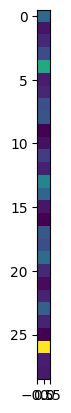

In [13]:
plt.imshow(letters1, interpolation='none')
plt.show()

above shows the relative probablities of each letter of the alphabet, a as 0, z as 25 and space as 26.

In [14]:
letters2 = np.zeros((len(alphabet),len(alphabet)),dtype='int')

for i in range(len(data)):

    if data[i] in alphabet and data[i+1] in alphabet:
        letters2[numAlpha[data[i]]][numAlpha[data[i+1]]] += 1


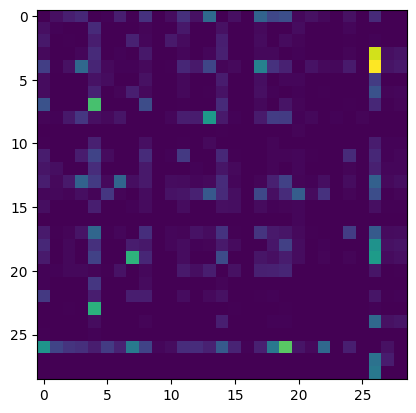

In [15]:
plt.imshow(letters2, interpolation='none')
plt.show()

Above shows the relative probablities of pairs of letters in the english alphabet. The rows have common first numbers, the columns are the subsequent letters.

In [16]:
letters3 = np.zeros((len(alphabet),len(alphabet),len(alphabet)),dtype='int')

for i in range(len(data)):

    if data[i] in alphabet and data[i+1] in alphabet and data[i+2] in alphabet:
        letters3[numAlpha[data[i]]][numAlpha[data[i+1]]][numAlpha[data[i+2]]] += 1

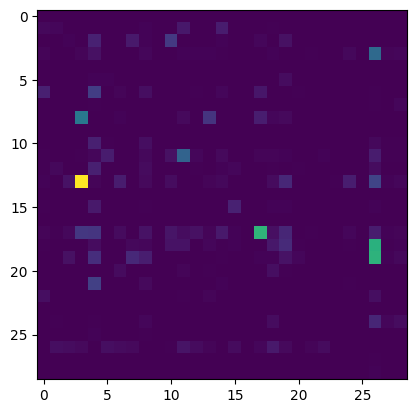

In [17]:
plt.imshow(letters3[0], interpolation='none')
plt.show()

the graph above shows the number of occurances of pairs of letters after the letter A, the most common by far is I, then D, to spell AID

In [18]:
letters4 = np.zeros((len(alphabet),len(alphabet),len(alphabet),len(alphabet)),dtype='int')

for i in range(len(data)):

    if data[i] in alphabet and data[i+1] in alphabet and data[i+2] in alphabet and data[i+3] in alphabet:
        letters4[numAlpha[data[i]]][numAlpha[data[i+1]]][numAlpha[data[i+2]]][numAlpha[data[i+3]]] += 1

In [19]:
letters5 = np.zeros((len(alphabet),len(alphabet),len(alphabet),len(alphabet),len(alphabet)),dtype='int')

for i in range(len(data)):

    if data[i] in alphabet and data[i+1] in alphabet and data[i+2] in alphabet and data[i+3] in alphabet and data[i+4] in alphabet:
        letters5[numAlpha[data[i]]][numAlpha[data[i+1]]][numAlpha[data[i+2]]][numAlpha[data[i+3]]][numAlpha[data[i+4]]] += 1

In [20]:
letters6 =  np.zeros([len(alphabet) for i in range(6)],dtype='int')

for i in range(len(data)):
    if data[i] in alphabet and data[i+1] in alphabet and data[i+2] in alphabet and data[i+3] in alphabet and data[i+4] in alphabet and data[i+5] in alphabet:
        letters6[numAlpha[data[i]]][numAlpha[data[i+1]]][numAlpha[data[i+2]]][numAlpha[data[i+3]]][numAlpha[data[i+4]]][numAlpha[data[i+5]]] += 1

the relative probabilites are calculated for numbers of lengths 1 to 6, ending in a 27x27x27x27x27x27 array of probabilites

In [21]:
letter1Probs = letters1/np.sum(letters1)
letter2Probs = letters2/np.sum(letters2)
letter3Probs = letters3/np.sum(letters3)
letter4Probs = letters4/np.sum(letters3)
letter5Probs = letters5/np.sum(letters5)
letter6Probs = letters6/np.sum(letters6)

In [22]:
def generateLetter1():
    word = ""
    first = np.random.random()
    letter = 0
    while first > letter1Probs[letter]:
        first -= letter1Probs[letter]
        letter += 1

    return alphabet[letter]

In [23]:
def generateLetter2(previous):
    probabilities = letter2Probs[numAlpha[previous]]
    num = np.random.random()*np.sum(probabilities)
    letter = 0
    while num > probabilities[letter]:
        num -= probabilities[letter]
        letter += 1

    return alphabet[letter]
    

In [24]:
def generateLetter3(previous2,previous1):
    probabilities = letter3Probs[numAlpha[previous2]][numAlpha[previous1]]
    num = np.random.random()*np.sum(probabilities)
    letter = 0
    while num > probabilities[letter]:
        num -= probabilities[letter]
        letter += 1

    return alphabet[letter]

In [25]:
def generateLetter4(previous3,previous2,previous1):
    probabilities = letter4Probs[numAlpha[previous3]][numAlpha[previous2]][numAlpha[previous1]]
    num = np.random.random()*np.sum(probabilities)
    letter = 0
    while num > probabilities[letter]:
        num -= probabilities[letter]
        letter += 1

    return alphabet[letter]

In [26]:
def generateLetter5(previous4,previous3,previous2,previous1):
    probabilities = letter5Probs[numAlpha[previous4]][numAlpha[previous3]][numAlpha[previous2]][numAlpha[previous1]]
    num = np.random.random()*np.sum(probabilities)
    letter = 0
    while num > probabilities[letter]:
        num -= probabilities[letter]
        letter += 1

    return alphabet[letter]

In [27]:
def generateLetter6(previous5,previous4,previous3,previous2,previous1):
    probabilities = letter6Probs[numAlpha[previous5]][numAlpha[previous4]][numAlpha[previous3]][numAlpha[previous2]][numAlpha[previous1]]
    num = np.random.random()*np.sum(probabilities)
    letter = 0
    while num > probabilities[letter]:
        num -= probabilities[letter]
        letter += 1

    return alphabet[letter]

In [28]:
def generateText6(length):
    text = ""

    text += generateLetter1()
    text += generateLetter2(text[-1])
    text += generateLetter3(text[-2],text[-1])
    text += generateLetter4(text[-3],text[-2],text[-1])
    text += generateLetter5(text[-4],text[-3],text[-2],text[-1])
    for i in range(length-4):
        text += generateLetter6(text[-5],text[-4],text[-3],text[-2],text[-1])

    return text

In [29]:
generateText6(10000)

'sly for goal potioned the just seemed experienced at it down it is, a flobberworms about to killed after the could suppose branching from the next passed in a bit of his scarlet slits, giving uncorking, we are do not come after you. ... but should along the boy, then the drawing my necessary had been for held out and he said to heard prickling house again, let me to careers he later, anywhere trying had used pointed to its rest, most people ... well, then we still like that the number of other tent as almost recovered, parchment air and pair time clearing all as though spectacles of new bit of the plans. ... safe now the could we canvas. aaaah, his neck over than he would asked that looking up to learned the secrets a good more into his late, sir, was a few flickered to the poured very fast thinking. ... been climbed and wait for the way toward they right a grip of find the saw a great bring up, and muttered, and the jets forcibly danger, the didnaaaaaargh aaaah, you tell me you wante